In [363]:
import numpy as np
import pandas as pd
import copy
import time
import matplotlib.pyplot as plt

In [364]:
# ORGANIZED DATA PREPROCESSING

In [277]:
data = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_cleaned_data.csv")
data

,AGE,SEX,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,...,T,N,M,IVC INV,MAX DIA,APPROACH,HISTOPATHOLOGY,GRADE,MONTHS,RECURRENCE
0,32,M,0,0,0,0,1,0,0,0.0,...,2,0,1,0,8.0,2,clear cell,2.0,95,0
1,45,F,0,0,0,0,1,1,0,0.0,...,4,1,1,0,4.9,1,clear cell,2.0,95,0
2,47,M,0,0,0,1,0,0,0,0.0,...,3b,0,1,1,9.0,1,clear cell,3.0,95,0
3,58,M,0,0,0,0,0,1,0,0.0,...,3a,0,0,0,7.0,2,clear cell,2.0,95,1
4,22,M,0,0,0,0,1,0,0,0.0,...,2b,0,0,0,10.4,1,clear cell,2.0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,64,M,0,0,0,0,1,0,0,0.0,...,3a,0,0,0,8.0,1,clear cell,4.0,18,0
691,49,M,0,0,0,0,0,1,0,0.0,...,2a,0,0,0,10.0,1,clear cell,3.0,18,0
692,73,M,0,1,0,0,0,1,0,0.0,...,3b,0,0,1,7.5,2,clear cell,1.0,18,0
693,65,F,0,0,0,0,1,0,0,0.0,...,3a,0,0,0,10.0,1,clear cell,1.0,18,0


In [282]:
x = data.copy()
y = x.pop("RECURRENCE")

In [283]:
x

,AGE,SEX,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,...,SITE,T,N,M,IVC INV,MAX DIA,APPROACH,HISTOPATHOLOGY,GRADE,MONTHS
0,32,M,0,0,0,0,1,0,0,0.0,...,left,2,0,1,0,8.0,2,clear cell,2.0,95
1,45,F,0,0,0,0,1,1,0,0.0,...,right,4,1,1,0,4.9,1,clear cell,2.0,95
2,47,M,0,0,0,1,0,0,0,0.0,...,right,3b,0,1,1,9.0,1,clear cell,3.0,95
3,58,M,0,0,0,0,0,1,0,0.0,...,right,3a,0,0,0,7.0,2,clear cell,2.0,95
4,22,M,0,0,0,0,1,0,0,0.0,...,left,2b,0,0,0,10.4,1,clear cell,2.0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,64,M,0,0,0,0,1,0,0,0.0,...,right,3a,0,0,0,8.0,1,clear cell,4.0,18
691,49,M,0,0,0,0,0,1,0,0.0,...,right,2a,0,0,0,10.0,1,clear cell,3.0,18
692,73,M,0,1,0,0,0,1,0,0.0,...,right,3b,0,0,1,7.5,2,clear cell,1.0,18
693,65,F,0,0,0,0,1,0,0,0.0,...,left,3a,0,0,0,10.0,1,clear cell,1.0,18


In [284]:
y

0      0
1      0
2      0
3      1
4      0
      ..
690    0
691    0
692    0
693    0
694    0
Name: RECURRENCE, Length: 695, dtype: int64

In [285]:
x.drop([0, 64], inplace = True)

In [286]:
x.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            685, 686, 687, 688, 689, 690, 691, 692, 693, 694],
           dtype='int64', length=693)

In [287]:
y = y[x.index]

In [289]:
x = x.reset_index(drop = True)
y = y.reset_index(drop = True)

In [290]:
x

,AGE,SEX,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,...,SITE,T,N,M,IVC INV,MAX DIA,APPROACH,HISTOPATHOLOGY,GRADE,MONTHS
0,45,F,0,0,0,0,1,1,0,0.0,...,right,4,1,1,0,4.9,1,clear cell,2.0,95
1,47,M,0,0,0,1,0,0,0,0.0,...,right,3b,0,1,1,9.0,1,clear cell,3.0,95
2,58,M,0,0,0,0,0,1,0,0.0,...,right,3a,0,0,0,7.0,2,clear cell,2.0,95
3,22,M,0,0,0,0,1,0,0,0.0,...,left,2b,0,0,0,10.4,1,clear cell,2.0,94
4,42,M,0,1,0,0,1,0,0,0.0,...,left,1a,0,0,0,3.0,1,clear cell,NaN,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,64,M,0,0,0,0,1,0,0,0.0,...,right,3a,0,0,0,8.0,1,clear cell,4.0,18
689,49,M,0,0,0,0,0,1,0,0.0,...,right,2a,0,0,0,10.0,1,clear cell,3.0,18
690,73,M,0,1,0,0,0,1,0,0.0,...,right,3b,0,0,1,7.5,2,clear cell,1.0,18
691,65,F,0,0,0,0,1,0,0,0.0,...,left,3a,0,0,0,10.0,1,clear cell,1.0,18


In [292]:
x['T'].value_counts()

1b    178
1a    176
3a    173
2a     87
3b     26
2b     24
4      23
3c      6
Name: T, dtype: int64

In [293]:
x['SITE'].value_counts()

right    366
left     323
b/l        4
Name: SITE, dtype: int64

In [294]:
ordinal_mapping = {'1a':0, '1b':1, '2a':2, '2b':3, '3a':4, '3b':5, '3c':6, '4':7}
x['ORDINAL_T'] = x['T'].replace(ordinal_mapping).astype(int)

In [296]:
x.drop('T', axis = 1, inplace = True)

In [297]:
x.columns

Index(['AGE', 'SEX', 'DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA',
       'MASS', 'LOW', 'FEVER', 'SITE', 'N', 'M', 'IVC INV', 'MAX DIA',
       'APPROACH', 'HISTOPATHOLOGY', 'GRADE', 'MONTHS', 'ORDINAL_T'],
      dtype='object')

In [298]:
column = x.pop('ORDINAL_T')
x.insert(12, column.name, column)

In [299]:
x

,AGE,SEX,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,...,SITE,ORDINAL_T,N,M,IVC INV,MAX DIA,APPROACH,HISTOPATHOLOGY,GRADE,MONTHS
0,45,F,0,0,0,0,1,1,0,0.0,...,right,7,1,1,0,4.9,1,clear cell,2.0,95
1,47,M,0,0,0,1,0,0,0,0.0,...,right,5,0,1,1,9.0,1,clear cell,3.0,95
2,58,M,0,0,0,0,0,1,0,0.0,...,right,4,0,0,0,7.0,2,clear cell,2.0,95
3,22,M,0,0,0,0,1,0,0,0.0,...,left,3,0,0,0,10.4,1,clear cell,2.0,94
4,42,M,0,1,0,0,1,0,0,0.0,...,left,0,0,0,0,3.0,1,clear cell,NaN,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,64,M,0,0,0,0,1,0,0,0.0,...,right,4,0,0,0,8.0,1,clear cell,4.0,18
689,49,M,0,0,0,0,0,1,0,0.0,...,right,2,0,0,0,10.0,1,clear cell,3.0,18
690,73,M,0,1,0,0,0,1,0,0.0,...,right,5,0,0,1,7.5,2,clear cell,1.0,18
691,65,F,0,0,0,0,1,0,0,0.0,...,left,4,0,0,0,10.0,1,clear cell,1.0,18


In [300]:
x['ORDINAL_T']

0      7
1      5
2      4
3      3
4      0
      ..
688    4
689    2
690    5
691    4
692    4
Name: ORDINAL_T, Length: 693, dtype: int32

In [301]:
x = pd.get_dummies(x, columns = ['SEX', 'HISTOPATHOLOGY', 'SITE'])

In [302]:
x

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,APPROACH,GRADE,MONTHS,SEX_F,SEX_M,HISTOPATHOLOGY_clear cell,HISTOPATHOLOGY_papillary,SITE_b/l,SITE_left,SITE_right
0,45,0,0,0,0,1,1,0,0.0,1,...,1,2.0,95,1,0,1,0,0,0,1
1,47,0,0,0,1,0,0,0,0.0,0,...,1,3.0,95,0,1,1,0,0,0,1
2,58,0,0,0,0,0,1,0,0.0,0,...,2,2.0,95,0,1,1,0,0,0,1
3,22,0,0,0,0,1,0,0,0.0,0,...,1,2.0,94,0,1,1,0,0,1,0
4,42,0,1,0,0,1,0,0,0.0,0,...,1,NaN,94,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,64,0,0,0,0,1,0,0,0.0,0,...,1,4.0,18,0,1,1,0,0,0,1
689,49,0,0,0,0,0,1,0,0.0,0,...,1,3.0,18,0,1,1,0,0,0,1
690,73,0,1,0,0,0,1,0,0.0,0,...,2,1.0,18,0,1,1,0,0,0,1
691,65,0,0,0,0,1,0,0,0.0,0,...,1,1.0,18,1,0,1,0,0,1,0


In [303]:
x.rename(columns = {'HISTOPATHOLOGY_clear cell':'HISTOPATHOLOGY_CLEAR CELL',
                    'HISTOPATHOLOGY_papillary':'HISTOPATHOLOGY_PAPILLARY', 'SITE_b/l':'SITE_B/L',
                    'SITE_left':'SITE_LEFT', 'SITE_right':'SITE_RIGHT'}, inplace = True)

In [304]:
x

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,APPROACH,GRADE,MONTHS,SEX_F,SEX_M,HISTOPATHOLOGY_CLEAR CELL,HISTOPATHOLOGY_PAPILLARY,SITE_B/L,SITE_LEFT,SITE_RIGHT
0,45,0,0,0,0,1,1,0,0.0,1,...,1,2.0,95,1,0,1,0,0,0,1
1,47,0,0,0,1,0,0,0,0.0,0,...,1,3.0,95,0,1,1,0,0,0,1
2,58,0,0,0,0,0,1,0,0.0,0,...,2,2.0,95,0,1,1,0,0,0,1
3,22,0,0,0,0,1,0,0,0.0,0,...,1,2.0,94,0,1,1,0,0,1,0
4,42,0,1,0,0,1,0,0,0.0,0,...,1,NaN,94,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,64,0,0,0,0,1,0,0,0.0,0,...,1,4.0,18,0,1,1,0,0,0,1
689,49,0,0,0,0,0,1,0,0.0,0,...,1,3.0,18,0,1,1,0,0,0,1
690,73,0,1,0,0,0,1,0,0.0,0,...,2,1.0,18,0,1,1,0,0,0,1
691,65,0,0,0,0,1,0,0,0.0,0,...,1,1.0,18,1,0,1,0,0,1,0


In [305]:
x.columns

Index(['AGE', 'DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS',
       'LOW', 'FEVER', 'ORDINAL_T', 'N', 'M', 'IVC INV', 'MAX DIA', 'APPROACH',
       'GRADE', 'MONTHS', 'SEX_F', 'SEX_M', 'HISTOPATHOLOGY_CLEAR CELL',
       'HISTOPATHOLOGY_PAPILLARY', 'SITE_B/L', 'SITE_LEFT', 'SITE_RIGHT'],
      dtype='object')

In [306]:
grade_index_list = [5, 58, 152, 290, 460, 462, 488, 565, 578, 586, 688]
for i in range(len(grade_index_list)):
    if (i <= 1):
        grade_index_list[i] -= 1
    else:
        grade_index_list[i] -= 2
grade_index_list

[4, 57, 150, 288, 458, 460, 486, 563, 576, 584, 686]

In [310]:
len(x.loc[grade_index_list, 'GRADE'])

11

In [309]:
x.loc[:, "GRADE"].isna().sum()

11

In [311]:
x.loc[grade_index_list, 'GRADE']

4     NaN
57    NaN
150   NaN
288   NaN
458   NaN
460   NaN
486   NaN
563   NaN
576   NaN
584   NaN
686   NaN
Name: GRADE, dtype: float64

In [312]:
x['GRADE'].value_counts()

2.0    277
1.0    226
3.0    123
4.0     56
Name: GRADE, dtype: int64

In [1]:
# SEX: ONE HOT using dummies (DONE) or sklearn preprocessing
# T: ORDINAL using dict (DONE) or sklearn
# HISTOPATHOLOGY: ONE HOT (DONE)
# drop (DONE) the record with 2, not worth the trouble?
# drop (DONE) the record with low nan?
# impute values with mode grade? got to try
# or just drop them as well?
# NORMALIZE? DO NOT NORMALIZE BEFORE SPLITTING!!!

In [314]:
x.loc[grade_index_list, 'GRADE'] = 2.0

In [318]:
x["B"] = 1

In [319]:
x

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,GRADE,MONTHS,SEX_F,SEX_M,HISTOPATHOLOGY_CLEAR CELL,HISTOPATHOLOGY_PAPILLARY,SITE_B/L,SITE_LEFT,SITE_RIGHT,B
0,45,0,0,0,0,1,1,0,0.0,1,...,2.0,95,1,0,1,0,0,0,1,1
1,47,0,0,0,1,0,0,0,0.0,0,...,3.0,95,0,1,1,0,0,0,1,1
2,58,0,0,0,0,0,1,0,0.0,0,...,2.0,95,0,1,1,0,0,0,1,1
3,22,0,0,0,0,1,0,0,0.0,0,...,2.0,94,0,1,1,0,0,1,0,1
4,42,0,1,0,0,1,0,0,0.0,0,...,2.0,94,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,64,0,0,0,0,1,0,0,0.0,0,...,4.0,18,0,1,1,0,0,0,1,1
689,49,0,0,0,0,0,1,0,0.0,0,...,3.0,18,0,1,1,0,0,0,1,1
690,73,0,1,0,0,0,1,0,0.0,0,...,1.0,18,0,1,1,0,0,0,1,1
691,65,0,0,0,0,1,0,0,0.0,0,...,1.0,18,1,0,1,0,0,1,0,1


In [320]:
x.to_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\Book2.csv", index = False)

In [352]:
X = np.array(x)
y = np.array(y)

In [353]:
# working with an svm loss
# rough 80:20 split on test and validation first
# then we look at the k-fold cv specifications and all, look at the txt doc

In [354]:
len(X) * 0.2

138.6

In [355]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [455]:
val_mask = np.random.choice(len(X), 139, replace = False)
X_val = X[val_mask]
y_val = y[val_mask]
train_mask = np.setdiff1d(np.arange(len(X)), val_mask)
X_train = X[train_mask]
y_train = y[train_mask]

In [456]:
print(y.shape, X.shape)
print(y_val.shape, X_val.shape)
print(y_train.shape, X_train.shape)

(693,) (693, 26)
(139,) (139, 26)
(554,) (554, 26)


In [498]:
def svm_loss_vectorized(W, X, y, reg):
    loss = 0.0
    dW = np.zeros(W.shape)  # initialize the gradient as zero
    scores = X.dot(W)
    mask = (list(range(len(y))), y)
    right_scores = scores[mask]
    right_scores = right_scores.reshape(len(y), 1)
    scores = scores - right_scores + 1
    scores[mask] = 0
    scores_mask = (scores > 0).astype(int)
    scores = scores * scores_mask
    mask_sum = scores_mask.sum(axis = 1) * -1
    scores_mask[mask] = mask_sum
    loss_vector = scores.sum(axis = 1)
    loss = loss_vector.sum() / X.shape[0] + reg * np.sum(W * W)

    # scores_mask = np.transpose(scores_mask)
    dW = np.matmul(np.transpose(X), scores_mask)
    dW /= X.shape[0]
    dW += 2 * W * reg

    return loss, dW

def softmax_loss_vectorized(W, X, y, reg):
    """
    Softmax loss function, vectorized version.

    Inputs and outputs are the same as softmax_loss_naive.
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)

    scores = X @ W
    scores -= np.max(scores, axis = 1)[:, np.newaxis]
    scores = np.exp(scores)
    dens = np.sum(scores, axis = 1)
    scores /= dens[:, np.newaxis]
    correct = scores[range(X.shape[0]), y]
    loss = np.sum(np.log(correct) * -1) / X.shape[0]
    scores[range(X.shape[0]), y] -= 1
    dW = np.transpose(X) @ scores
    dW /= X.shape[0]
    loss += reg * np.sum(W * W)
    dW += 2 * reg * W

    return loss, dW

class LinearClassifier(object):
    def __init__(self):
        self.W = None

    def train(
        self,
        X,
        y,
        learning_rate=1e-3,
        reg=1e-5,
        num_iters=100,
        batch_size=200,
        verbose=False,
    ):
        """
        Train this linear classifier using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        num_train, dim = X.shape
        num_classes = (
            np.max(y) + 1
        )  # assume y takes values 0...K-1 where K is number of classes
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in range(num_iters):
            X_batch = None
            y_batch = None

            mask = np.random.choice(num_train, batch_size)
            X_batch = X[mask]
            y_batch = y[mask]
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)
            self.W = self.W - learning_rate * grad
            if verbose and it % 1000 == 0:
                print("iteration %d / %d: loss %f" % (it, num_iters, loss))

        return loss_history

    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.

        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        y_pred = np.zeros(X.shape[0])
        y_pred = np.argmax(X.dot(self.W), axis = 1)
        return y_pred

    def loss(self, X_batch, y_batch, reg):
        """
        Compute the loss function and its derivative.
        Subclasses will override this.

        Inputs:
        - X_batch: A numpy array of shape (N, D) containing a minibatch of N
          data points; each point has dimension D.
        - y_batch: A numpy array of shape (N,) containing labels for the minibatch.
        - reg: (float) regularization strength.

        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.W; an array of the same shape as W
        """
        pass


class LinearSVM(LinearClassifier):
    """ A subclass that uses the Multiclass SVM loss function """

    def loss(self, X_batch, y_batch, reg):
        return svm_loss_vectorized(self.W, X_batch, y_batch, reg)

class Softmax(LinearClassifier):
    """ A subclass that uses the Softmax + Cross-entropy loss function """

    def loss(self, X_batch, y_batch, reg):
        return softmax_loss_vectorized(self.W, X_batch, y_batch, reg)

In [466]:
tic = time.time()
train_list = []
train_indices = []
val_list = []
val_indices = []
num_iters = int(input("enter the number of iterations for the experiment:"))
for i in range(100):
    svm1 = LinearSVM()
    loss_hist = svm1.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4, batch_size = 20, num_iters=num_iters)
#     print(np.argmax(X_train.dot(svm1.W), axis = 1))
#     print(y)
    y_train_pred = svm1.predict(X_train, 1)
    atrain = np.mean(y_train == y_train_pred)
#     print('training accuracy: %f' % (atrain, ))
    y_val_pred = svm1.predict(X_val, 2)
    aval = np.mean(y_val == y_val_pred)
#     print('validation accuracy: %f' % (aval, ))
    if (atrain not in train_list):
        train_list.append(atrain)
        train_indices.append(i)
    if (aval not in val_list):
        val_list.append(aval)
        val_indices.append(i)
toc = time.time()
print('That took %fs' % (toc - tic))
print(f"len(train_list): {len(train_list)}")
print(f"len(val_list): {len(val_list)}")
print(f"train_list: {train_list}")
print(f"val_list: {val_list}")

enter the number of iterations for the experiment:1500
That took 32.356755s
len(train_list): 1
len(val_list): 1
train_list: [0.8754512635379061]
val_list: [0.8705035971223022]


In [459]:
print(y_train_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [460]:
print(y_val_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [421]:
W1 = UU.copy()

In [417]:
W2 = UU.copy()

In [430]:
X_train[0]

array([45. ,  0. ,  0. ,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ,  1. ,  7. ,
        1. ,  1. ,  0. ,  4.9,  1. ,  2. , 95. ,  1. ,  0. ,  1. ,  0. ,
        0. ,  0. ,  1. ,  1. ])

In [429]:
W1

array([[ 6.13105427e-04,  8.61145032e-04],
       [-1.64075658e-03, -5.99348345e-04],
       [-4.79276373e-04,  1.08068908e-03],
       [ 1.38433767e-03,  6.01622296e-04],
       [-4.87205700e-04, -6.78322569e-04],
       [ 5.75642441e-04,  6.02962339e-04],
       [-1.36823995e-03,  1.77729548e-03],
       [ 9.78562326e-04, -7.70781704e-04],
       [-1.33245076e-03,  4.46273900e-04],
       [-1.12893147e-04,  6.01931584e-04],
       [ 1.15433035e-04,  2.86456972e-04],
       [-8.37111628e-04,  1.53512130e-04],
       [ 3.91062202e-04,  2.75046310e-03],
       [-1.25722438e-03,  1.10275207e-03],
       [-5.49185413e-04, -1.97592335e-04],
       [-6.75123066e-04, -3.77198674e-05],
       [-1.19997183e-04, -1.70576322e-03],
       [ 1.65760778e-03,  2.70852936e-04],
       [-9.40409855e-04,  7.18229603e-04],
       [-9.82390639e-04,  5.24082131e-04],
       [ 1.98269111e-04, -3.47755210e-04],
       [-1.10906637e-03, -1.22021548e-03],
       [ 5.51354910e-04, -1.20770111e-03],
       [-1.

In [423]:
W2

array([[ 7.80758726e-04, -7.80644977e-04],
       [ 1.35808191e-06, -1.30742077e-06],
       [ 3.25541435e-06, -3.76277442e-06],
       [ 5.24908702e-07, -4.49353041e-08],
       [ 4.65106433e-06, -5.01277136e-06],
       [ 6.74983513e-06, -5.58253497e-06],
       [ 3.85523375e-06, -1.76012861e-06],
       [ 1.07621519e-06, -2.86498325e-07],
       [ 1.01071073e-06, -9.78803499e-07],
       [ 5.67315186e-07, -9.37752505e-07],
       [ 2.45147856e-05, -2.48512077e-05],
       [ 9.73218236e-07, -4.53449354e-07],
       [ 1.67685033e-06, -1.37740043e-06],
       [ 9.21756662e-07, -1.46476217e-07],
       [ 9.20720097e-05, -9.27784559e-05],
       [ 2.55507218e-05, -2.56646304e-05],
       [ 2.55671655e-05, -2.61807205e-05],
       [ 7.60679738e-04, -7.60732636e-04],
       [ 5.93232329e-06, -4.06954642e-06],
       [ 9.38976709e-06, -9.56760454e-06],
       [ 1.48926380e-05, -1.40422849e-05],
       [-6.36325337e-07, -4.68265039e-07],
       [ 8.23600420e-07,  8.84899400e-08],
       [ 5.

In [426]:
X_train.dot(W1)[:100]

array([[0.18010874, 0.06851735],
       [0.18584572, 0.07409719],
       [0.16091979, 0.03947148],
       [0.17642029, 0.05837788],
       [0.18345608, 0.07002564],
       [0.1791475 , 0.07232461],
       [0.17601971, 0.06202158],
       [0.18291652, 0.06941426],
       [0.18274382, 0.08149923],
       [0.17770591, 0.06762829],
       [0.16853896, 0.06024517],
       [0.17905868, 0.07304758],
       [0.18370371, 0.08546958],
       [0.18250697, 0.0731863 ],
       [0.17184221, 0.06425961],
       [0.17160028, 0.0559723 ],
       [0.17013536, 0.06092983],
       [0.17461643, 0.06620727],
       [0.16596182, 0.05798312],
       [0.17887597, 0.07404934],
       [0.16209091, 0.04767123],
       [0.16133588, 0.04646095],
       [0.17846613, 0.07534587],
       [0.18345223, 0.07790507],
       [0.1686811 , 0.07078795],
       [0.1699372 , 0.05719823],
       [0.16050949, 0.05040481],
       [0.18466436, 0.08321597],
       [0.17337192, 0.06823686],
       [0.1788225 , 0.06937924],
       [0.

In [425]:
np.argmax(X_train.dot(W1), axis = 1), np.argmax(X_train.dot(W2), axis = 1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

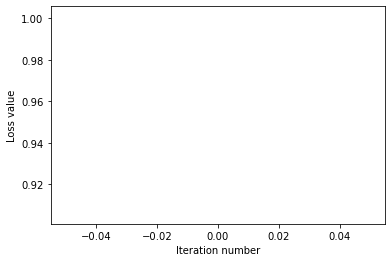

In [397]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [398]:
y_train_pred = svm1.predict(X_train, 1)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm1.predict(X_val, 2)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

0.8700361010830325
training accuracy: 0.870036
0.8920863309352518
validation accuracy: 0.892086


In [500]:
tic = time.time()
train_list = []
train_indices = []
val_list = []
val_indices = []
num_iters = int(input("enter the number of iterations for the experiment:"))
# num_iters = 0
for i in range(1):
    soft = Softmax()
    loss_hist = soft.train(X_train, y_train, learning_rate=1e-9, reg=2.5e4, batch_size = 20, num_iters=num_iters, verbose = True)
    y_train_pred = soft.predict(X_train)
    atrain = np.mean(y_train == y_train_pred)
    y_val_pred = soft.predict(X_val)
    aval = np.mean(y_val == y_val_pred)
    if (atrain not in train_list):
        train_list.append(atrain)
        train_indices.append(i)
    if (aval not in val_list):
        val_list.append(aval)
        val_indices.append(i)
toc = time.time()
print('That took %fs' % (toc - tic))
print(f"len(train_list): {len(train_list)}")
print(f"len(val_list): {len(val_list)}")
# print(f"train_list: {train_list}")
# print(f"val_list: {val_list}")
print(max(train_list))
print(max(val_list))

enter the number of iterations for the experiment:100000
iteration 0 / 100000: loss 1.688639
iteration 1000 / 100000: loss 1.588834
iteration 2000 / 100000: loss 1.503587
iteration 3000 / 100000: loss 1.426592
iteration 4000 / 100000: loss 1.354095
iteration 5000 / 100000: loss 1.289960
iteration 6000 / 100000: loss 1.231121
iteration 7000 / 100000: loss 1.180988
iteration 8000 / 100000: loss 1.133542
iteration 9000 / 100000: loss 1.088142
iteration 10000 / 100000: loss 1.048171
iteration 11000 / 100000: loss 1.010566
iteration 12000 / 100000: loss 0.982845
iteration 13000 / 100000: loss 0.957730
iteration 14000 / 100000: loss 0.926991
iteration 15000 / 100000: loss 0.906492
iteration 16000 / 100000: loss 0.880294
iteration 17000 / 100000: loss 0.864507
iteration 18000 / 100000: loss 0.852408
iteration 19000 / 100000: loss 0.824450
iteration 20000 / 100000: loss 0.809958
iteration 21000 / 100000: loss 0.796018
iteration 22000 / 100000: loss 0.790184
iteration 23000 / 100000: loss 0.787

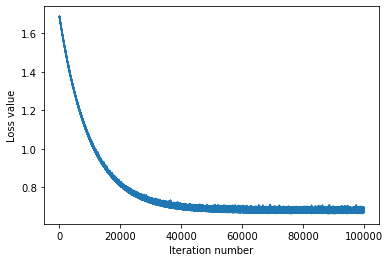

In [501]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [476]:
print(max(train_list))
print(max(val_list))

0.8754512635379061
0.8705035971223022


In [465]:
y_train_pred = softmax.predict(X_train, 1)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = softmax.predict(X_val, 2)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.875451
validation accuracy: 0.870504


In [461]:
# atleast i have one model trained and ready. first, clear all the unnecessary cells and make this less overwhelming. (DONE)
# split it into train and validation and then run, then check for accuracies (DONE)
# look for epochs in the cs231n code, what's the difference in the implementation and interpretation (DONE)
# why is my svm deterministic? run it in the colab code first, i'm making a mistake. (DONE)
# should i try cross-validation just yet? or hold on for a while...
# i'll go with sklearn preprocessing first and try the models there.

In [462]:
# IT ALWAYS PREDICTS EVERY PATIENT AS 0, THIS MAKES IT ACCURATE. FFS!
# SAME WITH THE SOFTMAX. IT ENDS UP HAVING MAX ACCURACY WITH PREDICTING 0 FOR ALL